In [5]:
"""
MNIST digit recognition using pytorch
"""

import pickle
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# the neural network class
class AshNet(nn.Module):
    
    def __init__(self):
        super(AshNet, self).__init__()
        # y = Wx + b
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # is it softmax by default?
        x = self.fc3(x)
        return x
    
net = AshNet()
print(net)


AshNet(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [3]:
# looking at the params
params = list(net.parameters())
print(f'len params: {len(params)}')
# 6 = num_layers * 2 ? (cuz weights and biases per layer)
for i in range(len(params)):
    print(f'{i}, {params[i].size()}')

len params: 6
0, torch.Size([120, 784])
1, torch.Size([120])
2, torch.Size([84, 120])
3, torch.Size([84])
4, torch.Size([10, 84])
5, torch.Size([10])


id: 203
3


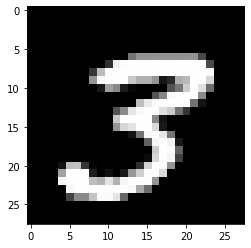

In [8]:
# import and view data
with open('data/mnist.pkl', 'rb') as f:
    train_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    
train_x, train_y = train_data

id = random.randint(1, 1000)
print(f'id: {id}')

plt.imshow(train_x[id].reshape((28, 28)), cmap=cm.Greys_r)
print(train_y[id])

n = len(train_data[0])
training_data = [(train_data[0][i], train_data[1][i]) for i in range(n) ]

epoch: 0, loss: 0.01686245069057865
epoch: 1, loss: 0.01217599625519351
epoch: 2, loss: 0.009849721777508648
epoch: 3, loss: 0.008388827203579344
epoch: 4, loss: 0.007543596433694926
epoch: 5, loss: 0.006676021343479337
epoch: 6, loss: 0.006173505641335616
epoch: 7, loss: 0.005610747101422656
epoch: 8, loss: 0.005261060102347246
epoch: 9, loss: 0.004937860825544434


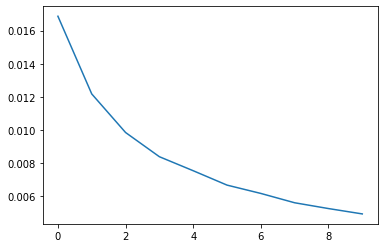

In [9]:
# the training loop

EPOCHS = 10
BATCH_SIZE = 32
loss_function = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

training_losses = []

for e in range(EPOCHS):
    random.shuffle(training_data)
    n = len(training_data)
    mini_batches = [training_data[k: k+BATCH_SIZE]
                       for k in range(0, n, BATCH_SIZE)]
    
    for mini_batch in mini_batches:
        net.zero_grad()
        for x, y  in mini_batch:
            # make to tensor can be more efficient
            out = net(torch.tensor(x))
            vec_y = torch.zeros((10))
            vec_y[y] = 1
            loss = loss_function(out, vec_y)
            loss.backward()
        optimizer.step()
        
    # calculating training loss
    # can be much muich more efficient
    loss_value = 0
    for mini_batch in mini_batches:
        for x, y  in mini_batch:
            out = net(torch.tensor(x))
            vec_y = torch.zeros((10))
            vec_y[y] = 1
            loss = loss_function(out, vec_y)
            loss_value += float(loss) / n
    print(f'epoch: {e}, loss: {loss_value}')
    training_losses.append(loss_value)
    
plt.plot(training_losses)

In [10]:
# is the net trained?


def get_accuracy(data_set):
    test_x, test_y = data_set
    success = 0
    total = len(test_x)
    for i in range(len(test_x)):
        pred = torch.argmax(net(torch.tensor(test_x[i])))
        if pred == test_y[i]:
            success += 1

    return round(success/total*100, 3)
    

print(f'test accuracy: {get_accuracy(test_data)}%')
print(f'validation accuracy: {get_accuracy(validation_data)}%')


test accuracy: 97.59%
validation accuracy: 97.56%


id: 2773
label: 5
pred: 5


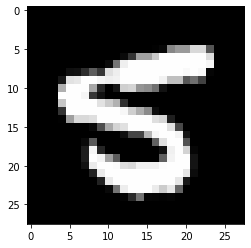

In [13]:
# let's see some examples

test_x, test_y = test_data

id = random.randint(1, 10000)
print(f'id: {id}')

plt.imshow(test_x[id].reshape((28, 28)), cmap=cm.Greys_r)
print(f'label: {test_y[id]}')

pred = torch.argmax(net(torch.tensor(test_x[id])))
print(f'pred: {pred}')
